In [1]:
import pandas as pd
df = pd.read_csv("iris.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
x = df.drop(columns=["species"])
y = df[["species"]]

In [7]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [11]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [12]:
x_pre = num_pipe.fit_transform(x)

In [13]:
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
model = LogisticRegression()

In [18]:
model.fit(xtrain, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
model.score(xtrain, ytrain)

0.9583333333333334

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

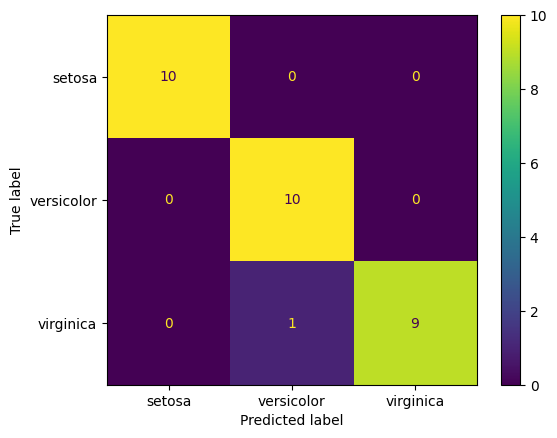

In [21]:
ConfusionMatrixDisplay.from_estimator(model,xtest, ytest )

In [22]:
ypred = model.predict(xtest)

In [23]:
ypred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(model, xtrain, ytrain, cv = 5, scoring="f1_macro")

d:\ml codes\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml codes\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml codes\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ml codes\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [29]:
scores

array([1.        , 0.91666667, 0.95816993, 0.91666667, 0.95816993])

In [30]:
scores.mean()

np.float64(0.9499346405228758)

In [31]:
x_new = pd.read_csv("iris_sample.csv")
x_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [32]:
x_new_pre = num_pipe.fit_transform(x_new)

In [33]:
x_new_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.446992,-1.086540e+00,0.099639,2.157391e-02
1,1.259705,4.096792e-01,0.866862,1.531748e+00
2,-0.934620,-1.086540e+00,-0.597836,-2.804609e-01
3,-1.787968,-8.906070e-02,0.000000,-1.639617e+00
4,0.040636,1.603093e-01,0.866862,7.766609e-01
5,-0.446992,1.407159e+00,-1.783543,-1.639617e+00
6,-0.325085,1.107425e-15,-0.179351,2.157391e-02
7,0.772077,1.603093e-01,0.936609,1.078696e+00
8,-0.690806,1.905899e+00,-1.644048,-1.639617e+00
9,-0.934620,1.157789e+00,-1.644048,3.353260e-16


In [34]:
preds = model.predict(x_new_pre)

In [35]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [36]:
probs = model.predict_proba(x_new_pre)

In [37]:
probs

array([[4.57475622e-02, 9.04374016e-01, 4.98784216e-02],
       [9.91953999e-05, 3.73981093e-02, 9.62502695e-01],
       [2.96789933e-01, 6.99966678e-01, 3.24338862e-03],
       [8.71216964e-01, 1.28768136e-01, 1.49000973e-05],
       [6.72795787e-03, 2.94493125e-01, 6.98778917e-01],
       [9.91115205e-01, 8.88478354e-03, 1.14466898e-08],
       [2.27625186e-01, 7.56893036e-01, 1.54817780e-02],
       [6.16224639e-04, 1.22195112e-01, 8.77188664e-01],
       [9.96274927e-01, 3.72506738e-03, 5.59205086e-09],
       [9.78040994e-01, 2.19458617e-02, 1.31445912e-05],
       [4.08047965e-02, 9.23437535e-01, 3.57576689e-02],
       [6.33996672e-02, 9.29182733e-01, 7.41760025e-03],
       [1.11672856e-06, 8.99303610e-03, 9.91005847e-01],
       [5.91482696e-03, 7.72139707e-01, 2.21945466e-01],
       [9.36104292e-04, 5.42741740e-01, 4.56322156e-01]])

In [38]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
x_new["species_pred"] = preds
x_new[model.classes_] = probs
x_new = x_new.round(4)
x_new

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0457,0.9044,0.0499
1,6.9,3.1,5.1,2.3,virginica,0.0001,0.0374,0.9625
2,5.1,2.5,3.0,1.1,versicolor,0.2968,0.7000,0.0032
3,4.4,2.9,NaN,0.2,setosa,0.8712,0.1288,0.0000
4,5.9,3.0,5.1,1.8,virginica,0.0067,0.2945,0.6988
5,5.5,3.5,1.3,0.2,setosa,0.9911,0.0089,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.2276,0.7569,0.0155
7,6.5,3.0,5.2,2.0,virginica,0.0006,0.1222,0.8772
8,5.3,3.7,1.5,0.2,setosa,0.9963,0.0037,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9780,0.0219,0.0000


In [40]:
x_new["species_pred"].value_counts()

species_pred
versicolor    7
virginica     4
setosa        4
Name: count, dtype: int64

In [41]:
x_new.to_csv("result.csv", index= False) 

In [42]:
#### Save the preprocessor and model object


In [44]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [46]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [48]:
m = joblib.load("pre.joblib")

In [49]:
m

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])